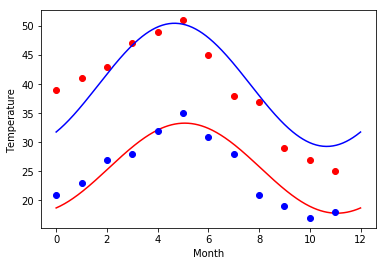

In [74]:
#We have the min and max temperatures in a city In India for each months of the year.
#We would like to find a function to describe this and show it graphically, the dataset given below.
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import optimize
months=np.arange(12)
tempmax = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
tempmin = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

res_min = optimize.curve_fit(yearly_temps,months,tempmin,[-40,20,0])
res_max =  optimize.curve_fit(yearly_temps, months,tempmax, [20, 10, 0])

def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      tempmin, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      tempmax, [-40, 20, 0])


days = np.linspace(0, 12, num=365)


plt.plot(months, tempmax, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, tempmin, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ')

plt.show()




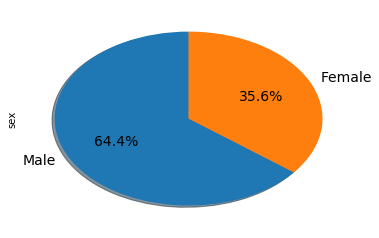

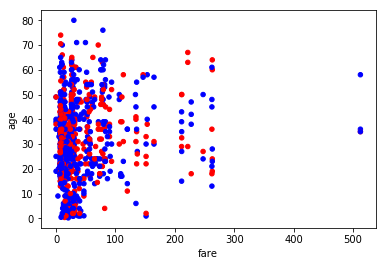

In [77]:
#This assignment is for visualization using matplotlib:
import pandas as pd
import matplotlib.pyplot as plt
url= "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic = pd.read_csv(url)
#Create a pie chart presenting the male/female proportion
labels = 'Male', 'Female'
titanic.sex.value_counts().plot(kind='pie',shadow=True, labels=labels,startangle=90,autopct='%1.1f%%', legend = False, fontsize=14)

#Create a scatterplot with the Fare paid and the Age, differ the plot color by gender
titanic.dropna(subset=['sex'],inplace=True)
mapping = {'male' : 'blue', 'female' : 'red'}
sexcol = titanic["sex"].map({'male':'r', 'female':'b'})
titanic.plot.scatter(x='fare',    y='age',  c=titanic['sex'].map(mapping))
plt.show()